Nombre: López Fabián Jesús Manuel

Grupo: 5AV1

Carrera: Licenciatura en Ciencia de Datos

Fecha última modificación: 12/05/2024

# Visualización de datos de alta dimensionalidad utilizando Análisis de Componentes Principales (PCA)

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

In [15]:
# Selecciona el estilo 'seaborn-v0_8' para los gráficos
plt.style.use('seaborn-v0_8')


In [17]:
# Lista de nombres de características originales
original_names = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]

# Lista de nombres inicializada con nombres fijos para las primeras dos características
names = ["ID_number", "Diagnosis"]

# Bucle para agregar sufijos numéricos a los nombres originales y agregarlos a la lista de nombres
for i in range(1, 4):  # Para i desde 1 hasta 3 (inclusive)
    for name in original_names:  # Para cada nombre en la lista de nombres originales
        names.append(name + str(i))  # Agrega el nombre con el sufijo numérico a la lista de nombres

# Al finalizar, la lista 'names' contendrá los nombres originales seguidos de números del 1 al 3


In [18]:
# Lee el archivo CSV y asigna nombres a las columnas utilizando la lista 'names'
df = pd.read_csv("Data/wdbc.data", names=names)

# Elimina la columna 'ID_number' del DataFrame
df.drop("ID_number", axis=1, inplace=True)

# Muestra las primeras filas del DataFrame para verificar los cambios
df.head()


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 1. Visualización inicial de datos y trasformación de los mismos.

a) Elegir las 6 dimensiones con mayor varianza en sus datos y graficarlas a través de graficas de bigotes.

In [20]:
# Calcula las varianzas de las características en el DataFrame, excluyendo la columna "Diagnosis"
variances = df.drop("Diagnosis", axis=1).agg("var")

# Selecciona las seis características con las mayores varianzas, las redondea a 3 decimales y las almacena en un nuevo DataFrame
top6_varianzas_preEstandarizado = pd.DataFrame(round(variances.sort_values(ascending=False)[:6], 3))

# Reinicia los índices del DataFrame para tener un índice secuencial
top6_varianzas_preEstandarizado.reset_index(inplace=True)

# Renombra las columnas del DataFrame como "Dimension" y "Varianza"
top6_varianzas_preEstandarizado.columns = ["Dimension", "Varianza"]

# Muestra el DataFrame con las seis características con las mayores varianzas previas a la estandarización
top6_varianzas_preEstandarizado


,Dimension,Varianza
0,area3,324167.385
1,area1,123843.554
2,area2,2069.432
3,perimeter3,1129.131
4,perimeter1,590.440
5,texture3,37.776


In [21]:
top6_varianzas_names_preEstandarizado = list(top6_varianzas_preEstandarizado["Dimension"])
print(top6_varianzas_names_preEstandarizado)

['area3', 'area1', 'area2', 'perimeter3', 'perimeter1', 'texture3']


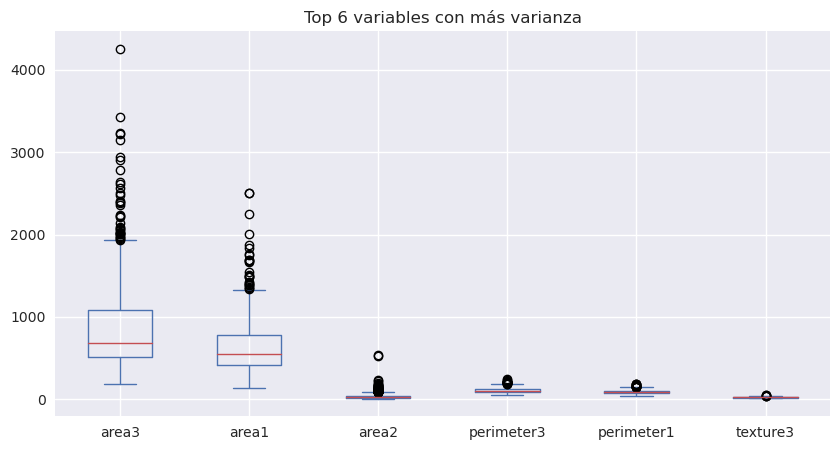

In [22]:
fig, ax = plt.subplots(figsize = (10,5))
df[top6_varianzas_names_preEstandarizado].plot(kind = "box", ax = ax)
plt.title("Top 6 variables con más varianza")
plt.show()

In [23]:
# Diccionario para almacenar información sobre los rangos de las características
rangos = {
    "Dimension": [],
    "Minimo": [],
    "Maximo": [],
    "Rango": []
}

# Itera sobre las dimensiones (características) en 'top6_varianzas_names_preEstandarizado'
for dimension in top6_varianzas_names_preEstandarizado:
    # Agrega la dimensión actual al diccionario
    rangos["Dimension"].append(dimension)
    # Calcula y agrega el mínimo de la dimensión actual al diccionario
    rangos["Minimo"].append(df[dimension].min())
    # Calcula y agrega el máximo de la dimensión actual al diccionario
    rangos["Maximo"].append(df[dimension].max())
    # Calcula y agrega el rango de la dimensión actual al diccionario
    rangos["Rango"].append(round(rangos["Maximo"][-1] - rangos["Minimo"][-1], 3))

# Convierte el diccionario 'rangos' en un DataFrame
rangos = pd.DataFrame(rangos)


In [24]:
rangos

,Dimension,Minimo,Maximo,Rango
0,area3,185.200,4254.00,4068.800
1,area1,143.500,2501.00,2357.500
2,area2,6.802,542.20,535.398
3,perimeter3,50.410,251.20,200.790
4,perimeter1,43.790,188.50,144.710
5,texture3,12.020,49.54,37.520


b) Estandarizar el conjunto de datos.

In [45]:
# Inicializa un nuevo DataFrame vacío para almacenar los datos estandarizados
df_scaled = pd.DataFrame()

# Itera sobre cada columna en el DataFrame 'df', excepto la columna 'Diagnosis'
for column in list(df.columns.drop("Diagnosis")):
    # Calcula la estandarización de la columna actual y la asigna a la correspondiente en el DataFrame 'df_scaled'
    df_scaled[column] = (df[column] - df[column].mean()) / df[column].std()


c) Repetir inciso a) con los nuevos datos estandarizados.

In [49]:
# Calcula las varianzas de las características estandarizadas en el DataFrame 'df_scaled', utilizando solo las características seleccionadas previamente
variances_scaled = df_scaled[top6_varianzas_names_preEstandarizado].agg("var")

# Selecciona las seis características con las mayores varianzas estandarizadas, las redondea a 3 decimales y las almacena en un nuevo DataFrame
varianzas_estandarizado = pd.DataFrame(round(variances_scaled.sort_values(ascending=False)[:6], 3))

# Reinicia los índices del DataFrame para tener un índice secuencial
varianzas_estandarizado.reset_index(inplace=True)

# Renombra las columnas del DataFrame como "Dimension" y "Varianza"
varianzas_estandarizado.columns = ["Dimension", "Varianza"]

# Muestra el DataFrame con las seis características con las mayores varianzas estandarizadas
varianzas_estandarizado


,Dimension,Varianza
0,area1,1.0
1,perimeter1,1.0
2,perimeter3,1.0
3,area2,1.0
4,texture3,1.0
5,area3,1.0


In [50]:
df_scaled[top6_varianzas_names_preEstandarizado].describe()

,area3,area1,area2,perimeter3,perimeter1,texture3
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,1.248757e-17,-2.185325e-16,-1.248757e-16,-3.496520e-16,-1.123881e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.221348e+00,-1.453164e+00,-7.371804e-01,-1.691872e+00,-1.982759e+00,-2.222039
25%,-6.415713e-01,-6.666089e-01,-4.943192e-01,-6.889721e-01,-6.913472e-01,-0.747971
50%,-3.408813e-01,-2.949274e-01,-3.474770e-01,-2.857288e-01,-2.357726e-01,-0.043477
75%,3.572747e-01,3.631877e-01,1.066787e-01,5.398040e-01,4.992377e-01,0.657762
max,5.924959e+00,5.245913e+00,1.103214e+01,4.283568e+00,3.972634e+00,3.882489


<Axes: >

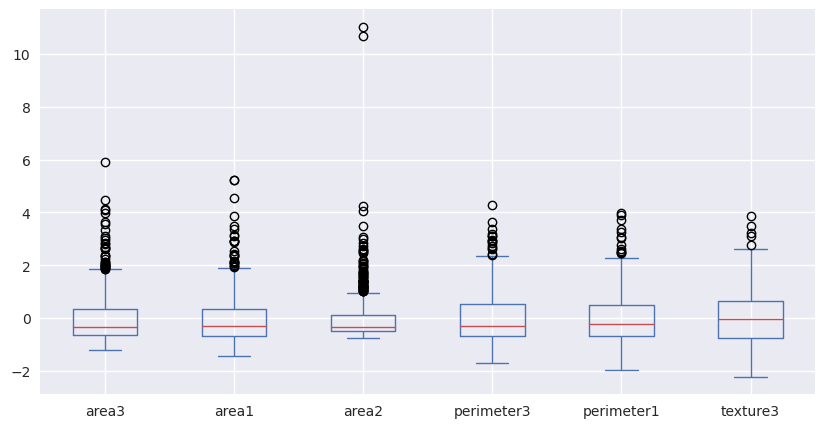

In [51]:
fig, ax = plt.subplots(figsize = (10,5))
df_scaled[top6_varianzas_names_preEstandarizado].plot(kind="box", ax = ax)

## 2. Cálculo de matriz de covarianza, descomposición de matriz en eigenvectores.

In [56]:
matriz_covarianza = df_scaled.cov()
matriz_covarianza

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

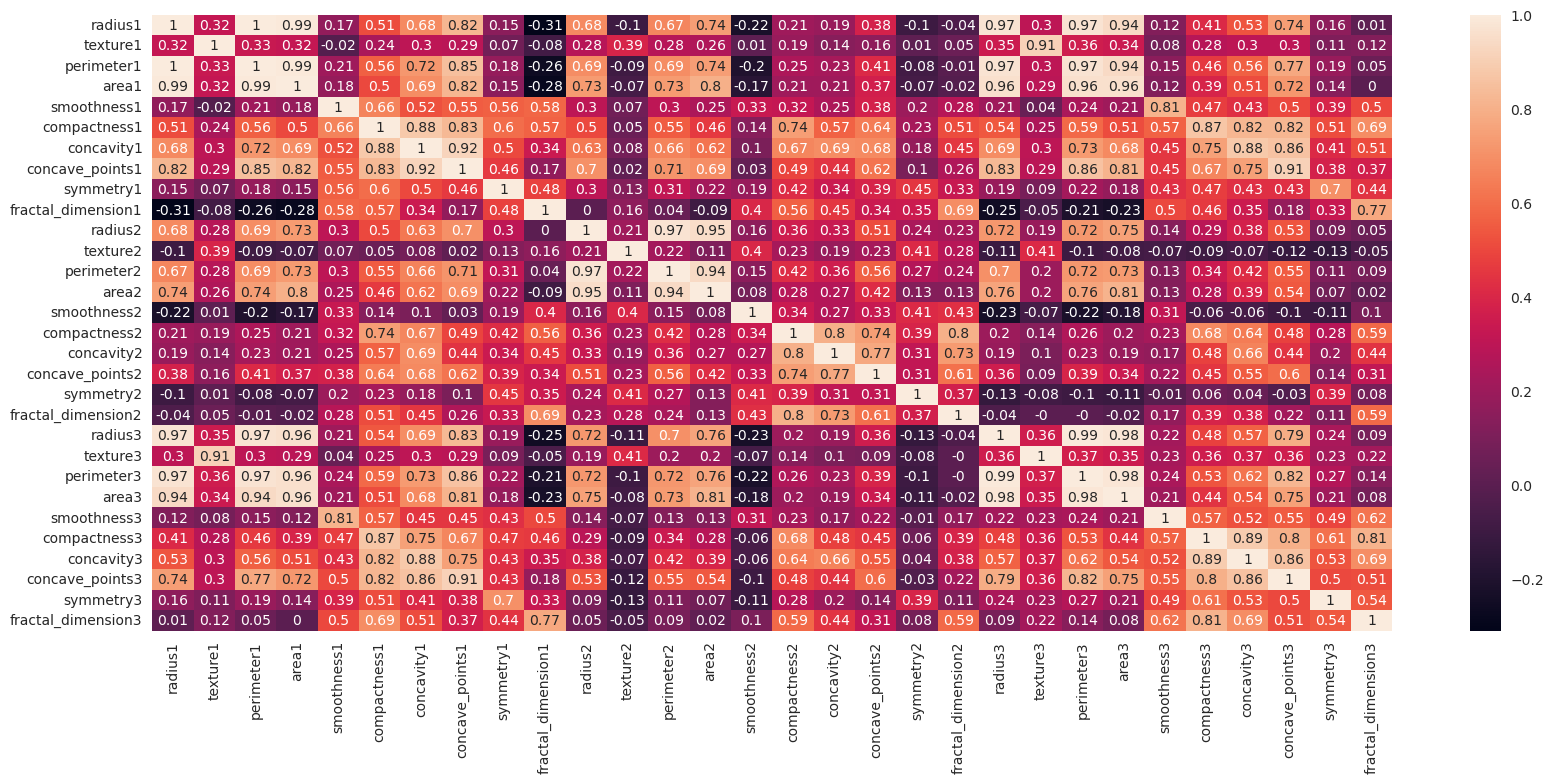

In [69]:
fig,ax = plt.subplots(figsize=(20,8))
sns.heatmap(round(matriz_covarianza,2), ax = ax, annot=True)

<Axes: >

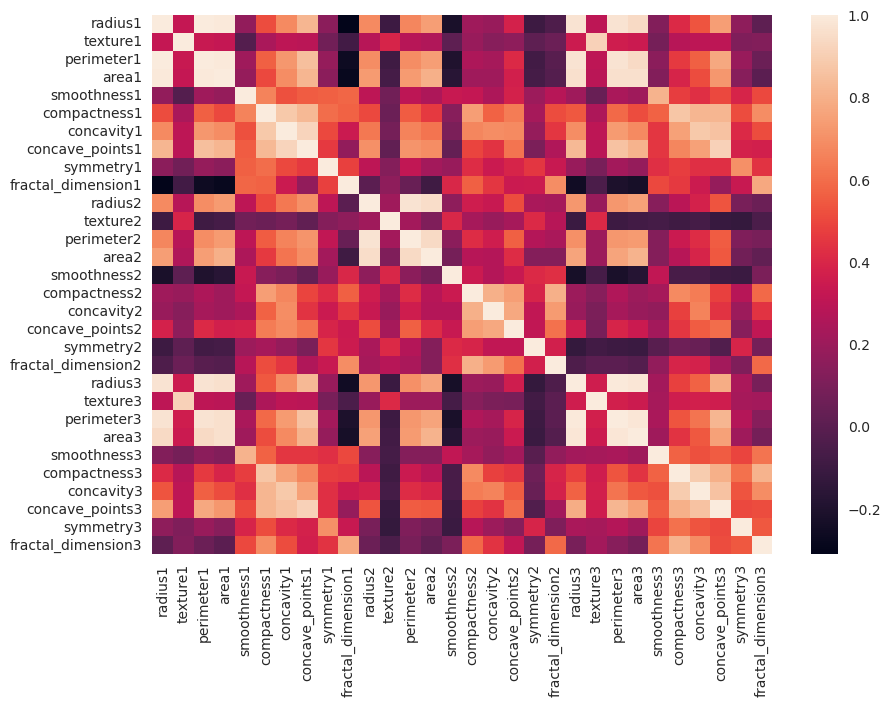

In [74]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(round(matriz_covarianza,2), ax = ax)

### Descomposición de matriz en eigenvectores

In [106]:
eigen_valores, eigen_vectores = np.linalg.eig(matriz_covarianza)

In [99]:
eigen_valores

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02])

In [100]:
eigen_vectores

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

## 3. Determinación de componentes principales.

### Ordenar los eigenvalores ascendentemente.

In [141]:
# Obtiene los índices que ordenarían los valores propios en orden ascendente
indices_ord_eigenval = np.argsort(eigen_valores)[::-1]

# Reordena los valores propios de acuerdo con el orden descendente
eigen_valores = eigen_valores[indices_ord_eigenval]

# Reordena los vectores propios de acuerdo con el orden descendente en todas las columnas
eigen_vectores = eigen_vectores[:, indices_ord_eigenval]


In [142]:
suma_eigenval = np.sum(eigen_valores)
suma_eigenval

30.000000000000007

In [147]:
proporcion_var_explicada = eigen_valores / suma_eigenval
proporcion_var_explicada 

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [146]:
# Calcula el número de componentes principales necesarios para retener al menos el 93% de la varianza explicada acumulativa
num_componentes_principales = np.argmax(np.cumsum(proporcion_var_explicada) >= 0.93) + 1
num_componentes_principales

9

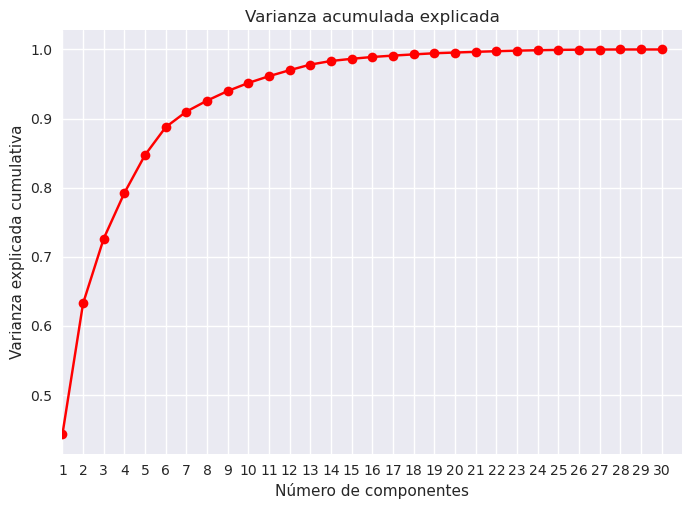

In [161]:
# Define el rango para el eje x
x = range(1, len(proporcion_var_explicada) + 1)

# Grafica la varianza acumulada explicada
plt.plot(x, np.cumsum(proporcion_var_explicada), marker='o', linestyle='-', color='r')

# Añade título y etiquetas de los ejes
plt.title("Varianza acumulada explicada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada cumulativa")

# Ajusta las marcas en el eje x y los límites
plt.xticks(x)
plt.xlim(1, len(proporcion_var_explicada) + 1)

# Habilita la cuadrícula en el gráfico
plt.grid(True)

# Muestra el gráfico
plt.show()

### Construcción de la matriz de proyección

In [169]:
componentes_principales = eigen_vectores[:, :num_componentes_principales]
it = 1
for i in componentes_principales:
    print("Eigen-vector" + str(it))
    print(i)
    it += 1

Eigen-vector1
[ 0.21890244 -0.23385713 -0.00853124  0.04140896 -0.03778635  0.01874079
  0.12408834  0.0074523  -0.22310976]
Eigen-vector2
[ 0.10372458 -0.05970609  0.0645499  -0.60305     0.04946885 -0.03217884
 -0.01139954 -0.13067483  0.11269939]
Eigen-vector3
[ 0.22753729 -0.21518136 -0.00931422  0.0419831  -0.03737466  0.01730844
  0.11447706  0.01868726 -0.22373921]
Eigen-vector4
[ 0.22099499 -0.23107671  0.02869953  0.0534338  -0.01033125 -0.00188775
  0.05165343 -0.0346736  -0.19558601]
Eigen-vector5
[ 0.14258969  0.18611302 -0.1042919   0.15938277  0.36508853 -0.2863745
  0.14066899  0.28897458  0.00642472]
Eigen-vector6
[ 0.23928535  0.15189161 -0.07409157  0.03179458 -0.01170397 -0.01413095
 -0.0309185   0.15139635 -0.16784142]
Eigen-vector7
[ 0.25840048  0.06016536  0.00273384  0.01912275 -0.08637541 -0.00934418
  0.10752044  0.07282729  0.04059101]
Eigen-vector8
[ 0.26085376 -0.0347675  -0.02556354  0.06533594  0.04386103 -0.05204995
  0.15048221  0.15232241 -0.11197111]
E

### Cálculo de nuevo espacio dimensional

In [173]:
datos_reducidos = np.dot(df_scaled, componentes_principales)
datos_reducidos = pd.DataFrame(datos_reducidos)
datos_reducidos.columns = ["PC" + str(x) for x in range(1,10)]
datos_reducidos.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,8.726917,1.468813,0.147241,1.452250,1.035323,0.329410,-2.954442,0.502800,-0.364597
1,1.915739,-1.480140,-1.287640,-0.379858,-1.290968,0.133329,-1.000411,-0.450874,-0.285596
2,5.405710,-0.573869,-0.517412,-0.515450,-0.009274,0.012021,-0.173876,-0.114007,0.063782
3,7.460645,5.329115,0.912112,0.254031,3.087015,0.913308,-0.215277,-0.229911,-2.720247
4,3.387969,-0.370326,0.383937,1.065993,-0.206807,-0.547168,0.018295,-1.123703,0.291875


## Generación de graficas para visualizar las nuevas dimensiones.

### Grafica para visualizar en barras la varianza explicada por cada componente, y en una línea de tendencia apreciar la ganacia acumulada de varianza en los datos a través de los distintos componentes principales.

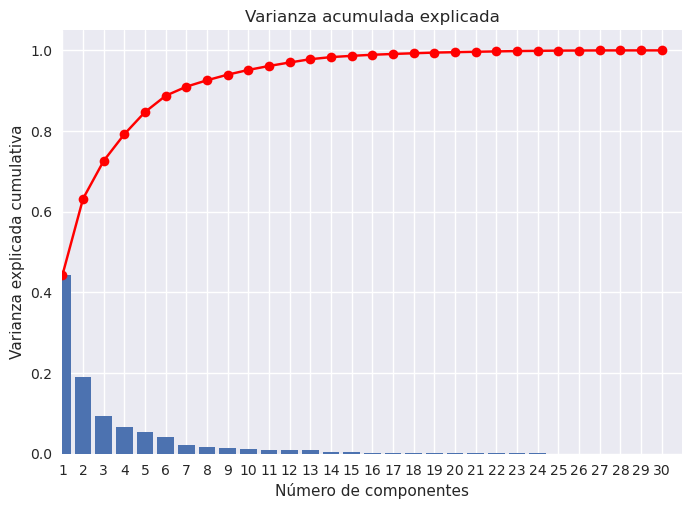

In [176]:
# Define el rango para el eje x
x = range(1, len(proporcion_var_explicada) + 1)

# Grafica la varianza acumulada explicada como un gráfico de líneas
plt.plot(x, np.cumsum(proporcion_var_explicada), marker='o', linestyle='-', color='r')

# Añade título y etiquetas de los ejes
plt.title("Varianza acumulada explicada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada cumulativa")

# Grafica la proporción de varianza explicada por cada componente como un gráfico de barras
plt.bar(x, proporcion_var_explicada)

# Ajusta las marcas en el eje x y los límites
plt.xticks(x)
plt.xlim(1, len(proporcion_var_explicada) + 1)

# Habilita la cuadrícula en el gráfico
plt.grid(True)

# Muestra el gráfico
plt.show()

In [195]:
ccircle = []  # Lista para almacenar las correlaciones de cada característica con respecto a las dos componentes principales
eucl_dist = []  # Lista para almacenar la distancia euclidiana de cada punto al origen

# Itera sobre cada característica estandarizada en el DataFrame
for i, j in enumerate(df_scaled.values.T):
    # Calcula la correlación de la característica con respecto a la primera componente principal
    corr1 = np.corrcoef(j, datos_reducidos.values[:, 0])[0, 1]
    # Calcula la correlación de la característica con respecto a la segunda componente principal
    corr2 = np.corrcoef(j, datos_reducidos.values[:, 1])[0, 1]
    # Agrega las correlaciones a la lista ccircle como una tupla
    ccircle.append((corr1, corr2))
    # Calcula la distancia euclidiana de cada punto al origen
    eucl_dist.append(np.sqrt(corr1 ** 2 + corr2 ** 2))

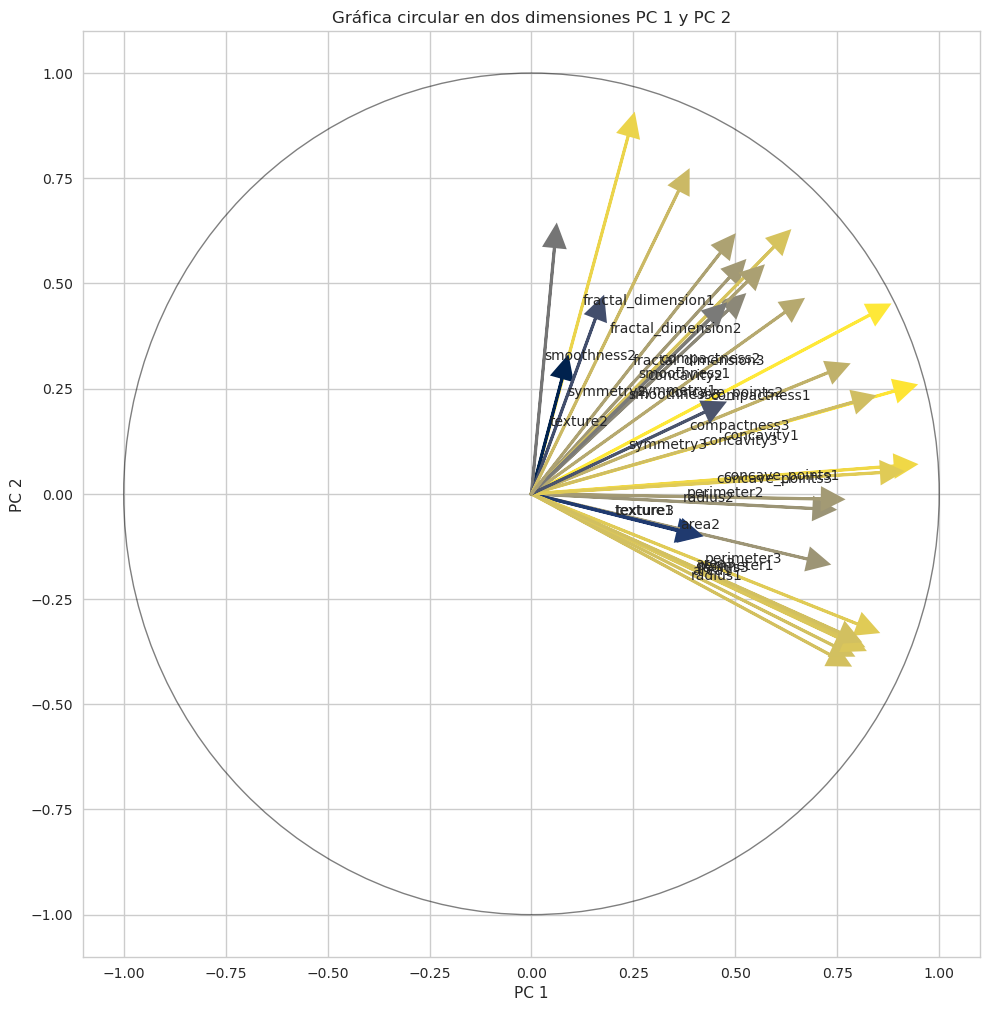

In [196]:
# Configuración del estilo de la gráfica
with plt.style.context(('seaborn-whitegrid')):
    # Crea una nueva figura y ejes
    fig, axs = plt.subplots(figsize=(10, 10))
    
    # Itera sobre cada característica
    for i, j in enumerate(eucl_dist):
        # Calcula el color de la flecha en función de la distancia euclidiana
        arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min()) / (np.array(eucl_dist).max() - np.array(eucl_dist).min()))
        # Dibuja una flecha desde el origen hasta la correlación de la característica con PC1 y PC2
        axs.arrow(0, 0,
                  ccircle[i][0],
                  ccircle[i][1],
                  lw=2,
                  length_includes_head=True,
                  color=arrow_col,
                  fc=arrow_col,
                  head_width=0.05,
                  head_length=0.05)
        # Añade el nombre de la característica cerca de su correlación
        axs.text(ccircle[i][0] / 2, ccircle[i][1] / 2, df_scaled.columns[i]) 

    # Dibuja el círculo que delimita las correlaciones perfectas
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)
    
    # Etiqueta los ejes
    axs.set_xlabel("PC 1")
    axs.set_ylabel("PC 2")

# Ajusta el diseño de la figura y muestra la gráfica
plt.tight_layout()
plt.title("Gráfica circular en dos dimensiones PC 1 y PC 2")
plt.show()


In [198]:
datos_reducidos

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,8.726917,1.468813,0.147241,1.452250,1.035323,0.329410,-2.954442,0.502800,-0.364597
1,1.915739,-1.480140,-1.287640,-0.379858,-1.290968,0.133329,-1.000411,-0.450874,-0.285596
2,5.405710,-0.573869,-0.517412,-0.515450,-0.009274,0.012021,-0.173876,-0.114007,0.063782
3,7.460645,5.329115,0.912112,0.254031,3.087015,0.913308,-0.215277,-0.229911,-2.720247
4,3.387969,-0.370326,0.383937,1.065993,-0.206807,-0.547168,0.018295,-1.123703,0.291875
...,...,...,...,...,...,...,...,...,...
564,5.868744,-1.070478,0.950844,-0.471800,0.085981,-1.613666,-0.586570,-0.455978,1.602798
565,3.759884,-1.478369,0.748743,-2.224733,-0.273339,-0.214610,0.016360,1.111810,0.123646
566,1.232604,-1.091480,-0.119310,-1.645476,-1.714337,0.012774,0.116344,-0.510831,0.637577
567,10.364879,0.748497,-0.637929,-1.968964,-0.031736,-0.170426,-0.296355,0.555117,-1.044098


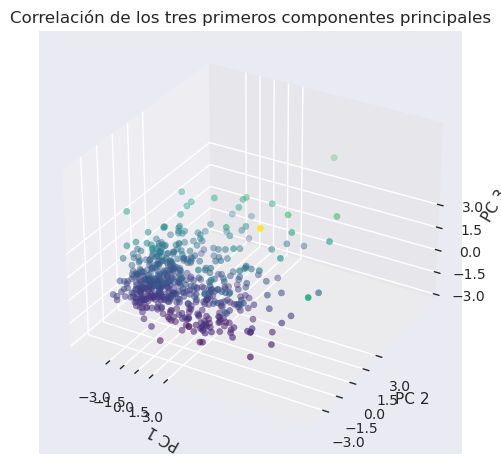

In [203]:
# Crea una nueva figura y ejes tridimensionales
fig = plt.figure()
ax = plt.axes(projection='3d')

# Datos para los ejes x, y, y z (los tres primeros componentes principales)
xdata = datos_reducidos.values[:, 0]
ydata = datos_reducidos.values[:, 1]
zdata = datos_reducidos.values[:, 2]

# Grafica los puntos tridimensionales (scatter plot) y asigna colores basados en los valores del componente z
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Establece el título del gráfico
plt.title(f'Correlación de los tres primeros componentes principales')

# Establece marcas y etiquetas para los ejes x, y, y z
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Etiqueta los ejes x, y, y z
ax.set_xlabel('PC 1', rotation=150)
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3', rotation=60)

# Muestra el gráfico tridimensional
plt.show()

## 5. Determinación de componentes principales a través de SVD.


In [232]:
# Calcular la descomposición en valores singulares (SVD) de la matriz de covarianza
U, S, Vt = np.linalg.svd(matriz_covarianza)

In [216]:
explained_variance_ratio = np.square(S) / np.sum(np.square(S))
cumulative_explained_variance_svd = np.cumsum(explained_variance_ratio)

# Calcula la cantidad de componentes necesarias para explicar el 93% de la varianza

n_components_93_percent_variance = np.argmax(cumulative_explained_variance_svd >= 0.93) + 1

print("Número de componentes necesarias para explicar el 93% de la varianza:", n_components_93_percent_variance)

Número de componentes necesarias para explicar el 93% de la varianza: 3


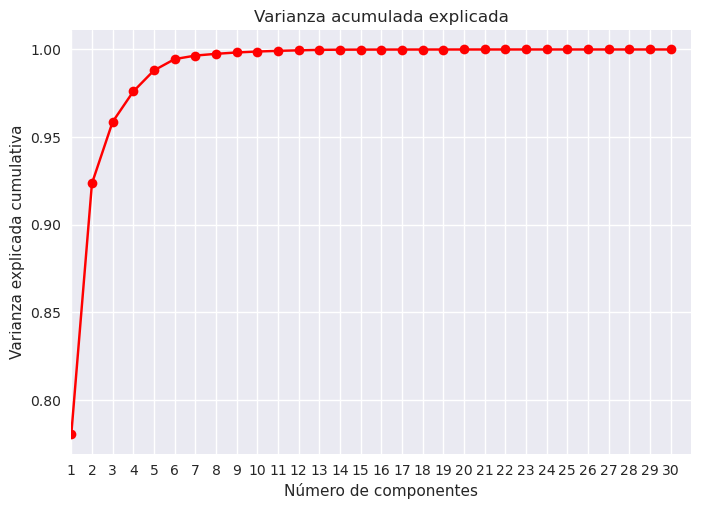

In [218]:
x = range(1, len(proporcion_var_explicada) + 1)
plt.plot(x, np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color = 'r')
plt.title("Varianza acumulada explicada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada cumulativa")

plt.xticks(x)
plt.xlim(1, len(proporcion_var_explicada) + 1)
plt.grid(True)
plt.show()

In [222]:
k = 3  # Número de componentes principales a retener
principal_components = Vt[:k].T

print("Matriz de proyección:")
it = 1
for i in principal_components:
    print("Vector" + str(it))
    print(i)
    it += 1

Matriz de proyección:
Vector1
[-0.21890244  0.23385713 -0.00853124]
Vector2
[-0.10372458  0.05970609  0.0645499 ]
Vector3
[-0.22753729  0.21518136 -0.00931422]
Vector4
[-0.22099499  0.23107671  0.02869953]
Vector5
[-0.14258969 -0.18611302 -0.1042919 ]
Vector6
[-0.23928535 -0.15189161 -0.07409157]
Vector7
[-0.25840048 -0.06016536  0.00273384]
Vector8
[-0.26085376  0.0347675  -0.02556354]
Vector9
[-0.13816696 -0.19034877 -0.04023994]
Vector10
[-0.06436335 -0.36657547 -0.02257409]
Vector11
[-0.20597878  0.10555215  0.26848139]
Vector12
[-0.01742803 -0.08997968  0.37463367]
Vector13
[-0.21132592  0.08945723  0.26664537]
Vector14
[-0.20286964  0.15229263  0.21600653]
Vector15
[-0.01453145 -0.20443045  0.30883898]
Vector16
[-0.17039345 -0.2327159   0.15477972]
Vector17
[-0.15358979 -0.19720728  0.17646374]
Vector18
[-0.1834174  -0.13032156  0.22465757]
Vector19
[-0.04249842 -0.183848    0.28858429]
Vector20
[-0.10256832 -0.28009203  0.21150376]
Vector21
[-0.22799663  0.21986638 -0.04750699]


In [224]:

X_transformed = np.dot(df_scaled, principal_components)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ["PC" + str(x) for x in range(1,4)]
X_transformed

,PC1,PC2,PC3
0,-9.184755,-1.946870,-1.122179
1,-2.385703,3.764859,-0.528827
2,-5.728855,1.074229,-0.551263
3,-7.116691,-10.266556,-3.229948
4,-3.931842,1.946359,1.388545
...,...,...,...
564,-6.433655,3.573673,2.457324
565,-3.790048,3.580897,2.086640
566,-1.255075,1.900624,0.562236
567,-10.365673,-1.670540,-1.875379


## Generación de graficas para visualizar las nuevas dimensiones.

### Gráfica para visualizar en barras la varianza por cada componente, y en una línea de tendencia apreciar la ganancia acumulada de varianza en los datos a través de los distintos compoenentes principales.

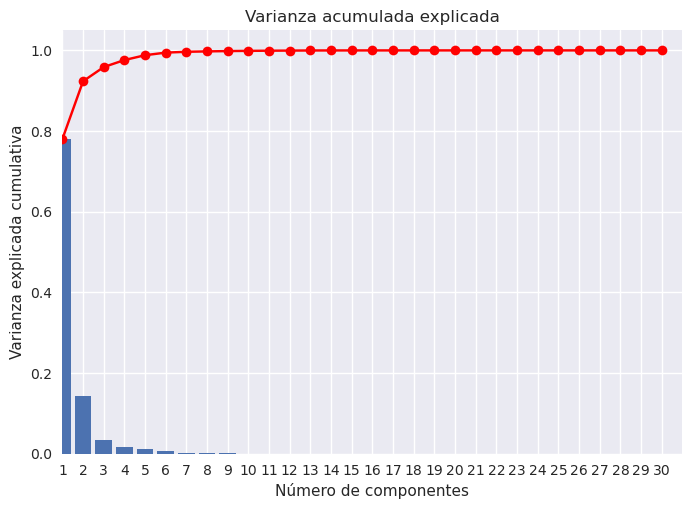

In [227]:
x = range(1, len(proporcion_var_explicada) + 1)
plt.plot(x, np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color = 'r')
plt.title("Varianza acumulada explicada")
plt.bar(x,explained_variance_ratio)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada cumulativa")

plt.xticks(x)
plt.xlim(1, len(proporcion_var_explicada) + 1)
plt.grid(True)
plt.show()

### Gráfica circular en dos dimensiones para visualizar la correlación entre los dos primeros componentes

In [228]:
ccircle = []
eucl_dist = []


for i,j in enumerate(df_scaled.values.T):
    corr1 = np.corrcoef(j,X_transformed.values[:,0])[0,1]
    corr2 = np.corrcoef(j,X_transformed.values[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

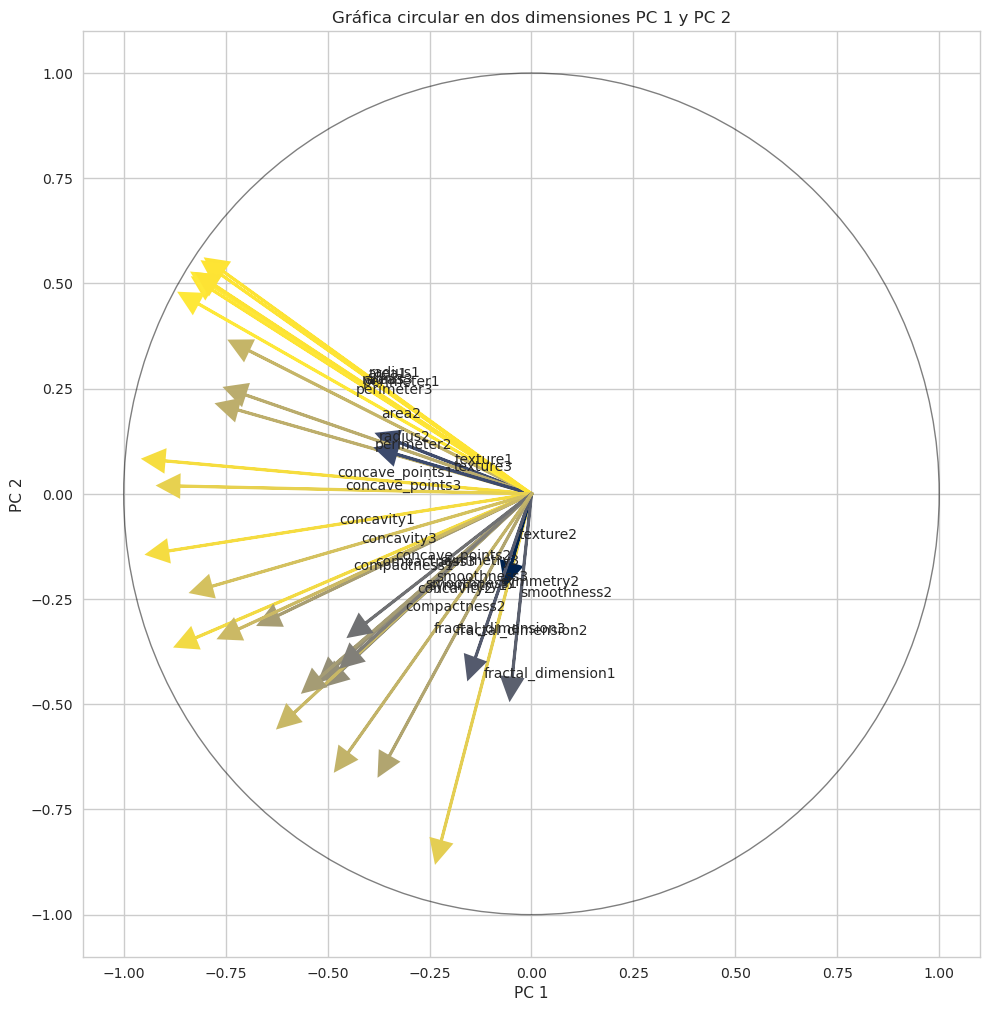

In [229]:
#Grafica de círculo
with plt.style.context(('seaborn-whitegrid')):
    fig, axs = plt.subplots(figsize=(10, 10))
    for i, j in enumerate(eucl_dist):
        arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min()) / (np.array(eucl_dist).max() - np.array(eucl_dist).min()))
        axs.arrow(0, 0,
                  ccircle[i][0],
                  ccircle[i][1],
                  lw=2,
                  length_includes_head=True,
                  color=arrow_col,
                  fc=arrow_col,
                  head_width=0.05,
                  head_length=0.05)
        axs.text(ccircle[i][0] / 2, ccircle[i][1] / 2, df_scaled.columns[i]) 
    # Dibuja el círculo
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)
    axs.set_xlabel("PC 1")
    axs.set_ylabel("PC 2")

plt.tight_layout()
plt.title("Gráfica circular en dos dimensiones PC 1 y PC 2")
plt.show()

### Gráfica en tres dimensiones para visualizar la correlación de los primeros tres componentes principales.

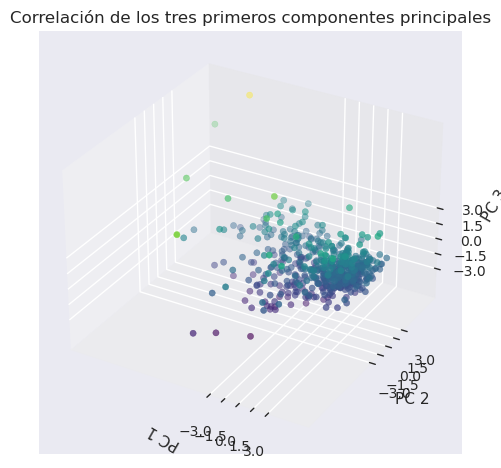

In [230]:
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = X_transformed.values[:,0]
ydata = X_transformed.values[:,1]
zdata = X_transformed.values[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'Correlación de los tres primeros componentes principales')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 


# Plot x, y, z labels
ax.set_xlabel('PC 1', rotation=150)
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3', rotation=60)
plt.show()